<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_mnist_manifold.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab -- MNIST manifold

PCA and t-SNE comparison with MNIST (8-by-8 and 28-by-28)

### References

* VanderPlas: [05.09-Principal-Component_Analysis.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb) -- github
* VanderPlas: [05.10-Manifold-Learning.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.10-Manifold-Learning.ipynb) -- github
* [Manifold learning of digits](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html) -- scikit-learn.org
* Mike Bostock: [Let's try t-SNE](https://observablehq.com/@mbostock/lets-try-t-sne) -- observablehq.com

In [1]:
# Cell 9
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
# Cell 10
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


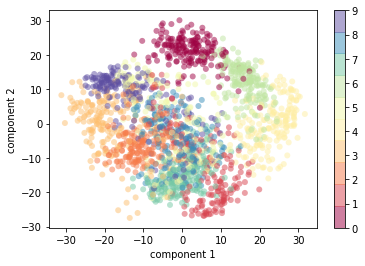

In [3]:
# Cell 11
# Need to change "spectral" to "Spectral" -- otherwise you get an error
import matplotlib.pyplot as plt

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [4]:
# Load MNIST 70K 28-by-28 pixel images with scikit-learn (less than a minute)
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = ((X / 255.) - .5) * 2
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=2000, random_state=123, stratify=y)